<a href="https://colab.research.google.com/github/kav3569/Premier-League-Match-Winners-Prediction/blob/main/PL_Win_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is 'matches.csv'
data = pd.read_csv('matches.csv')


Saving matches.csv to matches (1).csv


In [ ]:


matches = pd.read_csv("matches.csv", index_col=0)

matches.head()



,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [ ]:
matches.shape


(1389, 27)

In [ ]:
38*2*20

1520

In [ ]:
matches["team"].value_counts()

team
Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: count, dtype: int64

In [ ]:
matches["round"].value_counts()

round
Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: count, dtype: int64

In [ ]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [ ]:
matches["date"] = pd.to_datetime(matches["date"])

In [ ]:
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

In [ ]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [ ]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [ ]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [ ]:
matches["day_code"] = matches["date"].dt.dayofweek

In [ ]:
matches["date"] = pd.to_datetime(matches["date"])

In [ ]:
matches["target"] = (matches["result"] == "W").astype("int")

In [ ]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0


Creating the initial machine learning model


In [ ]:
rf = RandomForestClassifier (n_estimators=50, min_samples_split=10, random_state=1)

In [ ]:
train = matches[matches["date"] < '2022-01-01']

In [ ]:
test = matches[matches["date"] > '2022-01-01']

In [ ]:
train['day_code'] = train['date'].dt.dayofweek

<ipython-input-47-2efd7864a2ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_code'] = train['date'].dt.dayofweek


In [ ]:
test['day_code'] = test['date'].dt.dayofweek

<ipython-input-48-f2c0edb0cefd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['day_code'] = test['date'].dt.dayofweek


In [ ]:
print(train.columns)

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'venue_code', 'opp_code', 'hour', 'day_code',
       'target'],
      dtype='object')


In [ ]:
predictors = ["venue_code", "opp_code", "day_code", "hour"]

In [ ]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [ ]:
preds = rf.predict(test[predictors])

In [ ]:
error = accuracy_score(test["target"], preds)

In [ ]:
error

0.6086956521739131

In [ ]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [ ]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,139,33
1,75,29


In [ ]:
precision_score(test["target"], preds)

0.46774193548387094

In [ ]:
grouped_matches = matches.groupby("team")

In [ ]:
group = grouped_matches.get_group("Manchester City")

In [ ]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-05-01,12:30,Premier League,Matchweek 34,Sat,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2021,Manchester City,0,6,12,5,1
56,2021-05-08,17:30,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Chelsea,...,0.0,0.0,1.0,2021,Manchester City,1,5,17,5,0
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,W,4.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,0,14,20,4,1
58,2021-05-18,19:00,Premier League,Matchweek 37,Tue,Away,L,2.0,3.0,Brighton,...,1.0,0.0,0.0,2021,Manchester City,0,3,19,1,0


In [ ]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [ ]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


In [ ]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [ ]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [ ]:
matches_rolling = matches_rolling.droplevel('team')

In [ ]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [ ]:
matches_rolling.index = range(matches_rolling.shape[0])

In [ ]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [ ]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [ ]:
precision

0.5882352941176471

In [ ]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [ ]:
combined


,actual,predicted,date,team,opponent,result
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,1,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


<ipython-input-77-0c317107a2f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(combined, x='predicted', y='result', inner='stick', palette='Dark2')


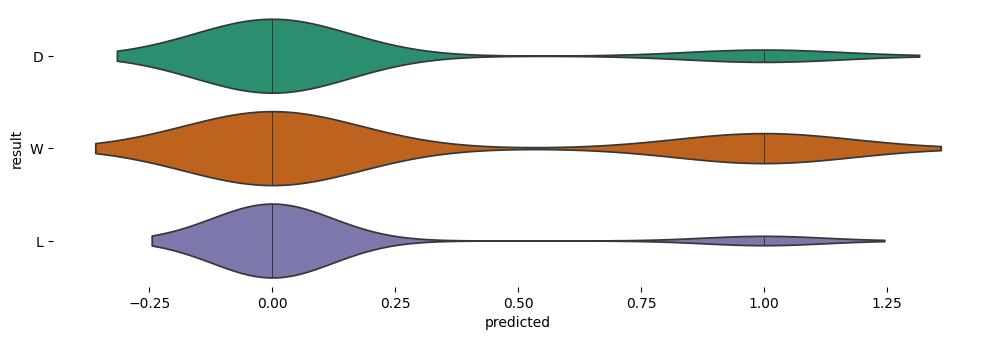

In [ ]:
# @title result vs predicted

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined['result'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined, x='predicted', y='result', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

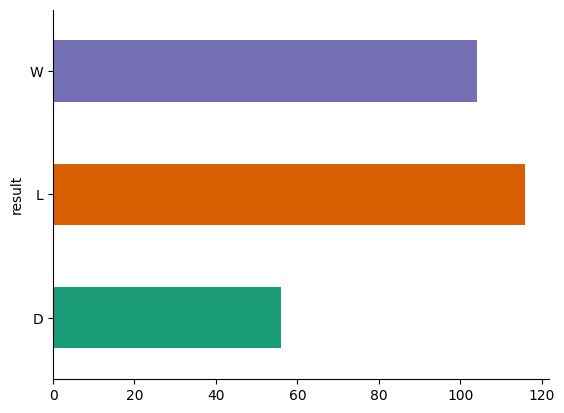

In [ ]:
# @title result

from matplotlib import pyplot as plt
import seaborn as sns
combined.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
combined.head(10)

,actual,predicted,date,team,opponent,result
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,1,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
60,1,1,2022-03-13,Arsenal,Leicester City,W
61,0,1,2022-03-16,Arsenal,Liverpool,L
62,1,0,2022-03-19,Arsenal,Aston Villa,W
63,0,0,2022-04-04,Arsenal,Crystal Palace,L
64,0,0,2022-04-09,Arsenal,Brighton,L


In [ ]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"}
mapping = MissingDict(**map_values)

In [ ]:
combined["new_team"] = combined["team"].map(mapping)

In [ ]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [ ]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,1,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,1,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [ ]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

actual_x
1    26
0    15
Name: count, dtype: int64

In [ ]:
26/40


0.65